En este archivo realizaré el analisis EDA

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud

C:\Users\JuanPablo\AppData\Local\Temp\ipykernel_22876\3099996270.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Identificamos tipos de datos y estructuras

In [4]:
cast = pd.read_csv("C:/Users/JuanPablo/Desktop/Kazan/Henry/PI_1/cast.csv")
crew = pd.read_csv("C:/Users/JuanPablo/Desktop/Kazan/Henry/PI_1/crew.csv")
movies = pd.read_csv("C:/Users/JuanPablo/Desktop/Kazan/Henry/PI_1/movies.csv")

print(cast.info())
print(crew.info())
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   movie_id        2000 non-null   int64  
 2   cast_id         2000 non-null   float64
 3   cast_character  1977 non-null   object 
 4   actor_id        2000 non-null   float64
 5   cast_name       2000 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 93.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2000 non-null   int64  
 1   movie_id         2000 non-null   int64  
 2   crew_department  2000 non-null   object 
 3   crew_id          2000 non-null   float64
 4   crew_job         2000 non-null   object 
 5   crew_name        2000 non-null   

Revisamos valores faltantes y/o duplicados

In [3]:
# Vemos cuántos valores nulos hay por columna
print(cast.isnull().sum())
print(crew.isnull().sum())
print(movies.isnull().sum())

# Ver duplicados
print(f"Duplicados: {cast.duplicated().sum()}")
print(f"Duplicados: {crew.duplicated().sum()}")
print(f"Duplicados: {movies.duplicated().sum()}")

Unnamed: 0         0
movie_id           0
cast_id            0
cast_character    23
actor_id           0
cast_name          0
dtype: int64
Unnamed: 0         0
movie_id           0
crew_department    0
crew_id            0
crew_job           0
crew_name          0
dtype: int64
Unnamed: 0            0
budget                0
genres               52
id                    0
popularity            0
release_date          0
revenue               0
runtime               5
title                 0
vote_average          0
vote_count            0
collection_id      1678
collection_name    1678
release_year          0
returncon             0
dtype: int64
Duplicados: 0
Duplicados: 0
Duplicados: 0


In [4]:
# Descripción general
print(cast.describe())
print(crew.describe())
print(movies.describe())

        Unnamed: 0       movie_id      cast_id      actor_id
count  2000.000000    2000.000000  2000.000000  2.000000e+03
mean    999.500000   19293.588000    31.488500  2.619161e+05
std     577.494589   29950.776812    61.326579  5.046271e+05
min       0.000000       5.000000     1.000000  3.000000e+00
25%     499.750000     902.000000     8.750000  7.907750e+03
50%     999.500000    9909.000000    17.000000  2.962700e+04
75%    1499.250000   19760.000000    32.000000  1.196262e+05
max    1999.000000  188588.000000  1007.000000  1.904515e+06
       Unnamed: 0       movie_id       crew_id
count  2000.00000    2000.000000  2.000000e+03
mean     38.37650   10666.112000  5.946624e+05
std      24.25046   19370.589156  7.247467e+05
min       0.00000       5.000000  7.000000e+00
25%      19.00000     755.000000  1.108875e+04
50%      35.00000    4482.000000  7.490150e+04
75%      61.00000   11859.250000  1.411277e+06
max      84.00000  188588.000000  1.897893e+06
        Unnamed: 0        bu

Generamos un grafico relacion entre el presupuesto y el retorno

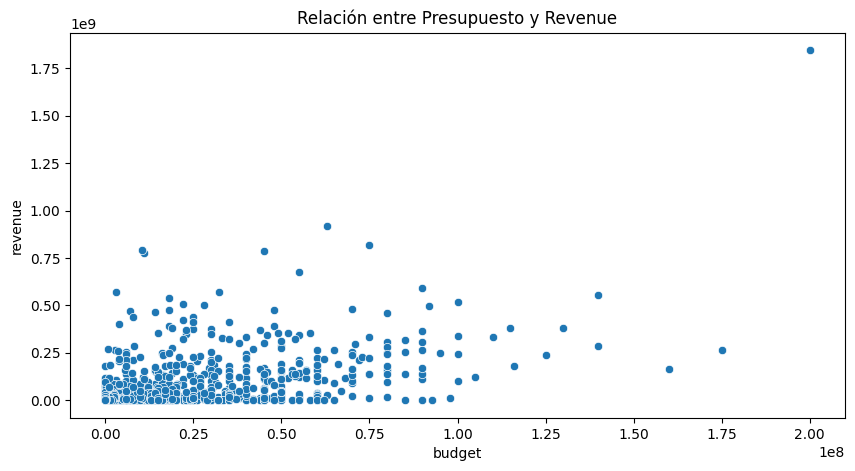

In [6]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=movies, x="budget", y="revenue")
plt.title("Relación entre Presupuesto y Revenue")
plt.show()

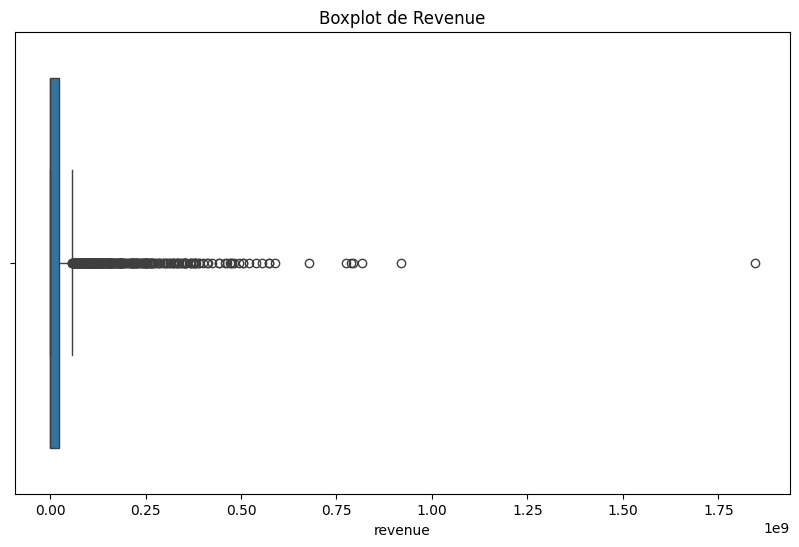

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=movies, x='revenue')
plt.title("Boxplot de Revenue")
plt.show()

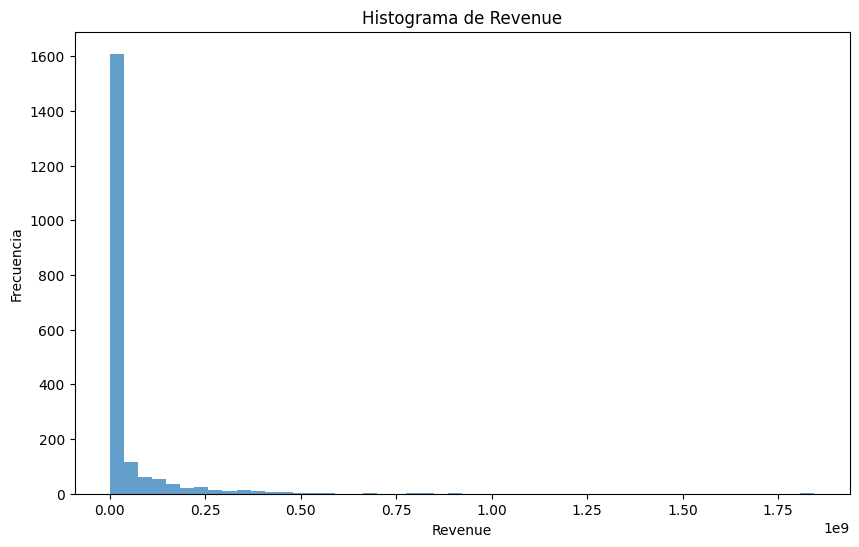

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(movies['revenue'], bins=50, alpha=0.7)
plt.title("Histograma de Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frecuencia")
plt.show()

Realizamos una nube de palabras para ver que palabras son las más frecuentes en los titulos

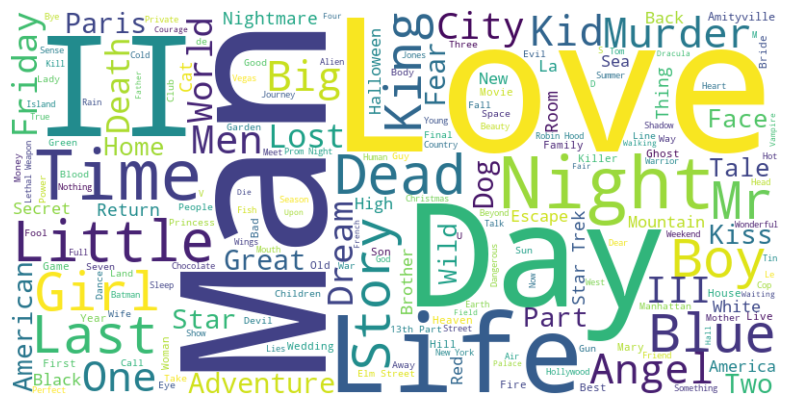

In [5]:
texto = " ".join(movies["title"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()


Queda bastante lindo :))